In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from tic_tac_toe_env import TicTacToeEnv
from tic_tac_toe_agents import QLearningAgent, SarsaAgent, RandomAgent

env = TicTacToeEnv(verbose=False)

## Base Models

### Random vs. Random

In [ ]:
def simulate_random_games(num_games, agent1, agent2, agent1_name=None, agent2_name=None):
    env = TicTacToeEnv()
    print(f'Player 1: {agent1_name if agent1_name else agent1.algorithm}')
    print(f'Player 2: {agent2_name if agent2_name else agent2.algorithm}')

    results = {"wins": 0, "losses": 0, "draws": 0}
    for _ in tqdm(range(num_games), desc='Games'):
        state = env.reset()
        done = False
        while not done:
            action = agent1.get_action(state)
            state, reward, done = env.step(action)
            if done:
                break

            action = agent2.get_action(state)
            state, reward, done = env.step(action)

        if reward == 1:  # Assuming reward 1 for a win and -1 for a loss
            results["wins"] += 1
        elif reward == -1:
            results["losses"] += 1
        else:
            results["draws"] += 1
        
    win_percentage = (results["wins"] / num_games) * 100
    loss_percentage = (results["losses"] / num_games) * 100
    draw_percentage = (results["draws"] / num_games) * 100

    print(f"Win Percentage : {win_percentage:>5}%")
    print(f"Loss Percentage: {loss_percentage:>5}%")
    print(f"Draw Percentage: {draw_percentage:>5}%")

    return results


In [ ]:
num_games = 25000  # Number of games to simulate
results = simulate_random_games(num_games, RandomAgent(), RandomAgent())

Player 1: random
Player 2: random


Games: 100%|██████████| 25000/25000 [00:13<00:00, 1913.19it/s]

Win Percentage :   0.0%
Loss Percentage:   0.0%
Draw Percentage: 100.0%


### Q-Learning Base Model

In [2]:
qagent = QLearningAgent()

In [3]:
qagent.train(env, num_episodes=100000, save_per_episodes=25000, model_name='q_learn_base', verbose=False)

2024-04-20 19:39:44.970196 | Training for q_learn_base_Apr20_193944 agent started


Episodes: 100%|██████████| 100000/100000 [28:02<00:00, 59.45it/s]


2024-04-20 20:07:48.323065 | Training for q_learn agent Completed. Time taken: 0:28:03.352869
Q-Table saved to q_learn_base_Apr20_193944_qtable.pkl


In [3]:
qagent.load_q_table('q_learn_base_Apr20_193944_qtable.pkl')

Hyperparameters
alpha	: epsilon-greedy
gamma	: 0.9
epsilon	: 0.1
epsilon_min	: 0.1
epsilon_decay	: 0.9
algorithm	: q_learn
Reward Function
              Reward
valid_move       1.0
invalid_move     0.0
win             20.0
lose           -20.0
draw            -5.0


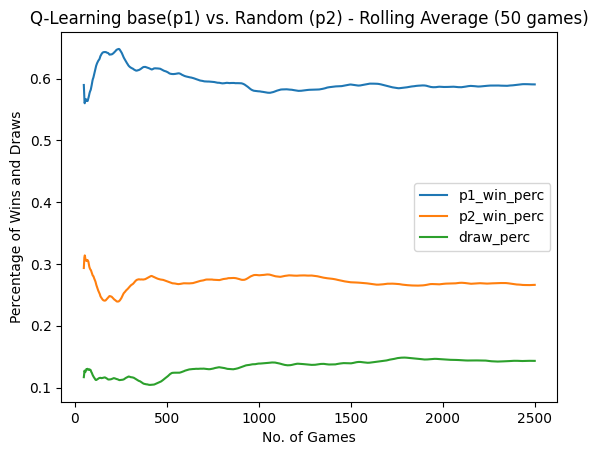

,p1_wins,p2_wins,draws,tot_reward,steps,p1_win_perc,p2_win_perc,draw_perc
0,1,0,0,23.0,27,1.000000,0.000000,0.000000
1,2,0,0,23.0,10,1.000000,0.000000,0.000000
2,3,0,0,23.0,24,1.000000,0.000000,0.000000
3,3,1,0,4.0,28,0.750000,0.250000,0.000000
4,3,1,1,-1.0,49,0.600000,0.200000,0.200000
...,...,...,...,...,...,...,...,...
2495,1474,665,357,4.0,33,0.590545,0.266426,0.143029
2496,1475,665,357,23.0,37,0.590709,0.266320,0.142972
2497,1475,666,357,3.0,16,0.590472,0.266613,0.142914
2498,1476,666,357,24.0,68,0.590636,0.266507,0.142857


In [4]:
results = qagent.test(env, opponent=RandomAgent(), num_episodes=2500, model_name='', plot_title='Q-Learning base(p1) vs. Random (p2) - Rolling Average (50 games)')
results

### SARSA Base model

In [5]:
sagent = SarsaAgent()

In [5]:
sagent.train(env, num_episodes=100000, save_per_episodes=25000, model_name='sarsa_base', verbose=False)

2024-04-20 20:11:56.562559 | Training for sarsa_base_Apr20_201156 agent started


Episodes: 100%|██████████| 100000/100000 [23:12<00:00, 71.83it/s]


2024-04-20 20:35:08.670201 | Training for sarsa agent Completed. Time taken: 0:23:12.107642
Q-Table saved to sarsa_base_Apr20_201156_qtable.pkl


In [6]:
sagent.load_q_table('sarsa_base_Apr20_201156_qtable.pkl')

Hyperparameters
alpha	: epsilon-greedy
gamma	: 0.9
epsilon	: 0.1
epsilon_min	: 0.1
epsilon_decay	: 0.9
algorithm	: sarsa
Reward Function
              Reward
valid_move       1.0
invalid_move     0.0
win             20.0
lose           -20.0
draw            -5.0


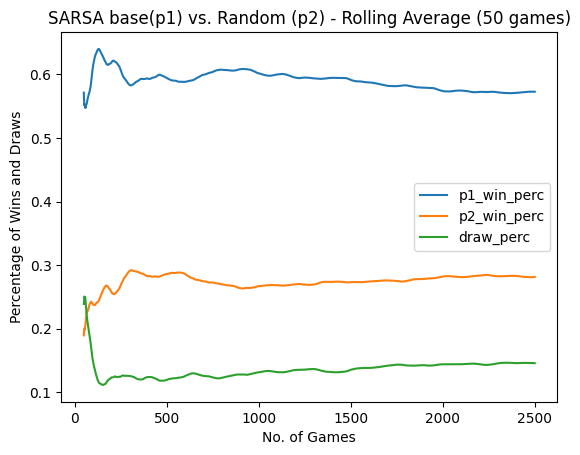

,p1_wins,p2_wins,draws,tot_reward,steps,p1_win_perc,p2_win_perc,draw_perc
0,1,0,0,24.0,52,1.000000,0.000000,0.000000
1,2,0,0,24.0,41,1.000000,0.000000,0.000000
2,2,1,0,4.0,50,0.666667,0.333333,0.000000
3,2,1,1,-1.0,63,0.500000,0.250000,0.250000
4,3,1,1,23.0,60,0.600000,0.200000,0.200000
...,...,...,...,...,...,...,...,...
2495,1429,705,362,3.0,28,0.572516,0.282452,0.145032
2496,1430,705,362,23.0,53,0.572687,0.282339,0.144974
2497,1430,706,362,3.0,21,0.572458,0.282626,0.144916
2498,1431,706,362,22.0,33,0.572629,0.282513,0.144858


In [7]:
results = sagent.test(env, opponent=RandomAgent(), num_episodes=2500, plot_title='SARSA base(p1) vs. Random (p2) - Rolling Average (50 games)')
results

## Hyperparameter Tuning

##### Finding number of iterations required for epsilon decay

In [6]:
import math

epsilon_start = 1.0
epsilon_min = 0.01
epsilon_decay = 0.995

# Calculate the number of iterations needed for epsilon to reach epsilon_min
iterations = math.log(epsilon_min / epsilon_start) / math.log(epsilon_decay)
iterations

918.7295284714154

At the decay rate of 0.995, the epsilon would reach to minimum in 919 iterations.  
So, epsilon decay can be implemented at episode level as we are running 50000 episodes in hyperparameter tuning.

In [10]:
results.tail(1)

,p1_wins,p2_wins,draws,tot_reward,steps,p1_win_perc,p2_win_perc,draw_perc
2499,1431,707,362,4.0,34,0.5724,0.2828,0.1448


In [19]:
results.iloc[-1]['p2_win_perc']

0.2828

In [5]:
ROOT_PATH = os.getcwd() + os.path.sep
RESULTS_PATH = ROOT_PATH + 'results' + os.path.sep

In [2]:
def run_experiment(agent_class, alpha, gamma, model_name, episodes=50000, test_episodes=2500):
    env = TicTacToeEnv(verbose=False)
    agent = agent_class(alpha=alpha, gamma=gamma)
    agent.train(env, num_episodes=episodes, save_per_episodes=episodes, model_name=model_name)

    results = agent.test(env, num_episodes=test_episodes, model_name=model_name, plot_results=False)
    loss_percentage = results.iloc[-1]['p2_win_perc']
    return loss_percentage

In [3]:
# Hyperparameters
alphas = [0.1, 0.3, 0.5, 0.9]
gammas = [0.9, 0.95, 0.99]
results = []

In [6]:
# Experiment with each combination of alpha and gamma
for alpha in alphas:
    for gamma in gammas:
        model_name = f'a{alpha}_g{gamma}'
        print(f'Experimenting with alpha: {alpha} and gamma: {gamma}')
        loss_q = run_experiment(QLearningAgent, alpha, gamma, model_name='q_learn_'+model_name)
        loss_s = run_experiment(SarsaAgent, alpha, gamma, model_name='sarsa_'+model_name)
        results.append({
            'Agent': 'QLearning', 'Alpha': alpha, 'Gamma': gamma, 'Loss%': loss_q
        })
        results.append({
            'Agent': 'SARSA', 'Alpha': alpha, 'Gamma': gamma, 'Loss%': loss_s
        })

df_results = pd.DataFrame(results)
df_results.to_csv(f'{RESULTS_PATH}hyperparameter_comparison.csv', index=False)
df_results

Experimenting with alpha: 0.1 and gamma: 0.9
2024-04-20 23:09:26.775230 | Training for q_learn_a0.1_g0.9_Apr20_230926 agent started


Episodes: 100%|██████████| 50000/50000 [12:43<00:00, 65.48it/s]


2024-04-20 23:22:10.425783 | Training for q_learn agent Completed. Time taken: 0:12:43.650553
Q-Table saved to q_learn_a0.1_g0.9_Apr20_230926_qtable.pkl
Hyperparameters
alpha	: 0.1
gamma	: 0.9
epsilon	: 0.01
epsilon_min	: 0.01
epsilon_decay	: 0.995
algorithm	: q_learn
Reward Function
              Reward
valid_move       1.0
invalid_move     0.0
win             20.0
lose           -20.0
draw            -5.0
2024-04-20 23:22:14.870195 | Training for sarsa_a0.1_g0.9_Apr20_232214 agent started


Episodes: 100%|██████████| 50000/50000 [11:36<00:00, 71.74it/s]


2024-04-20 23:33:51.861919 | Training for sarsa agent Completed. Time taken: 0:11:36.991724
Q-Table saved to sarsa_a0.1_g0.9_Apr20_232214_qtable.pkl
Hyperparameters
alpha	: 0.1
gamma	: 0.9
epsilon	: 0.01
epsilon_min	: 0.01
epsilon_decay	: 0.995
algorithm	: sarsa
Reward Function
              Reward
valid_move       1.0
invalid_move     0.0
win             20.0
lose           -20.0
draw            -5.0
Experimenting with alpha: 0.1 and gamma: 0.95
2024-04-20 23:33:56.378120 | Training for q_learn_a0.1_g0.95_Apr20_233356 agent started


Episodes: 100%|██████████| 50000/50000 [12:14<00:00, 68.05it/s]


2024-04-20 23:46:11.117678 | Training for q_learn agent Completed. Time taken: 0:12:14.739558
Q-Table saved to q_learn_a0.1_g0.95_Apr20_233356_qtable.pkl
Hyperparameters
alpha	: 0.1
gamma	: 0.95
epsilon	: 0.01
epsilon_min	: 0.01
epsilon_decay	: 0.995
algorithm	: q_learn
Reward Function
              Reward
valid_move       1.0
invalid_move     0.0
win             20.0
lose           -20.0
draw            -5.0
2024-04-20 23:46:15.653943 | Training for sarsa_a0.1_g0.95_Apr20_234615 agent started


Episodes: 100%|██████████| 50000/50000 [11:12<00:00, 74.37it/s]


2024-04-20 23:57:27.966281 | Training for sarsa agent Completed. Time taken: 0:11:12.312338
Q-Table saved to sarsa_a0.1_g0.95_Apr20_234615_qtable.pkl
Hyperparameters
alpha	: 0.1
gamma	: 0.95
epsilon	: 0.01
epsilon_min	: 0.01
epsilon_decay	: 0.995
algorithm	: sarsa
Reward Function
              Reward
valid_move       1.0
invalid_move     0.0
win             20.0
lose           -20.0
draw            -5.0
Experimenting with alpha: 0.1 and gamma: 0.99
2024-04-20 23:57:32.467019 | Training for q_learn_a0.1_g0.99_Apr20_235732 agent started


Episodes: 100%|██████████| 50000/50000 [12:08<00:00, 68.68it/s]


2024-04-21 00:09:40.533065 | Training for q_learn agent Completed. Time taken: 0:12:08.066046
Q-Table saved to q_learn_a0.1_g0.99_Apr20_235732_qtable.pkl
Hyperparameters
alpha	: 0.1
gamma	: 0.99
epsilon	: 0.01
epsilon_min	: 0.01
epsilon_decay	: 0.995
algorithm	: q_learn
Reward Function
              Reward
valid_move       1.0
invalid_move     0.0
win             20.0
lose           -20.0
draw            -5.0
2024-04-21 00:09:45.031883 | Training for sarsa_a0.1_g0.99_Apr21_000945 agent started


Episodes: 100%|██████████| 50000/50000 [11:16<00:00, 73.89it/s]


2024-04-21 00:21:01.726945 | Training for sarsa agent Completed. Time taken: 0:11:16.695062
Q-Table saved to sarsa_a0.1_g0.99_Apr21_000945_qtable.pkl
Hyperparameters
alpha	: 0.1
gamma	: 0.99
epsilon	: 0.01
epsilon_min	: 0.01
epsilon_decay	: 0.995
algorithm	: sarsa
Reward Function
              Reward
valid_move       1.0
invalid_move     0.0
win             20.0
lose           -20.0
draw            -5.0
Experimenting with alpha: 0.3 and gamma: 0.9
2024-04-21 00:21:06.231219 | Training for q_learn_a0.3_g0.9_Apr21_002106 agent started


Episodes: 100%|██████████| 50000/50000 [12:08<00:00, 68.68it/s]


2024-04-21 00:33:14.292088 | Training for q_learn agent Completed. Time taken: 0:12:08.060869
Q-Table saved to q_learn_a0.3_g0.9_Apr21_002106_qtable.pkl
Hyperparameters
alpha	: 0.3
gamma	: 0.9
epsilon	: 0.01
epsilon_min	: 0.01
epsilon_decay	: 0.995
algorithm	: q_learn
Reward Function
              Reward
valid_move       1.0
invalid_move     0.0
win             20.0
lose           -20.0
draw            -5.0
2024-04-21 00:33:18.704552 | Training for sarsa_a0.3_g0.9_Apr21_003318 agent started


Episodes: 100%|██████████| 50000/50000 [11:02<00:00, 75.46it/s]


2024-04-21 00:44:21.289522 | Training for sarsa agent Completed. Time taken: 0:11:02.584970
Q-Table saved to sarsa_a0.3_g0.9_Apr21_003318_qtable.pkl
Hyperparameters
alpha	: 0.3
gamma	: 0.9
epsilon	: 0.01
epsilon_min	: 0.01
epsilon_decay	: 0.995
algorithm	: sarsa
Reward Function
              Reward
valid_move       1.0
invalid_move     0.0
win             20.0
lose           -20.0
draw            -5.0
Experimenting with alpha: 0.3 and gamma: 0.95
2024-04-21 00:44:25.790629 | Training for q_learn_a0.3_g0.95_Apr21_004425 agent started


Episodes: 100%|██████████| 50000/50000 [11:49<00:00, 70.47it/s]


2024-04-21 00:56:15.370001 | Training for q_learn agent Completed. Time taken: 0:11:49.579372
Q-Table saved to q_learn_a0.3_g0.95_Apr21_004425_qtable.pkl
Hyperparameters
alpha	: 0.3
gamma	: 0.95
epsilon	: 0.01
epsilon_min	: 0.01
epsilon_decay	: 0.995
algorithm	: q_learn
Reward Function
              Reward
valid_move       1.0
invalid_move     0.0
win             20.0
lose           -20.0
draw            -5.0
2024-04-21 00:56:19.820096 | Training for sarsa_a0.3_g0.95_Apr21_005619 agent started


Episodes: 100%|██████████| 50000/50000 [10:58<00:00, 75.94it/s]


2024-04-21 01:07:18.200028 | Training for sarsa agent Completed. Time taken: 0:10:58.379932
Q-Table saved to sarsa_a0.3_g0.95_Apr21_005619_qtable.pkl
Hyperparameters
alpha	: 0.3
gamma	: 0.95
epsilon	: 0.01
epsilon_min	: 0.01
epsilon_decay	: 0.995
algorithm	: sarsa
Reward Function
              Reward
valid_move       1.0
invalid_move     0.0
win             20.0
lose           -20.0
draw            -5.0
Experimenting with alpha: 0.3 and gamma: 0.99
2024-04-21 01:07:22.662560 | Training for q_learn_a0.3_g0.99_Apr21_010722 agent started


Episodes: 100%|██████████| 50000/50000 [11:57<00:00, 69.71it/s]


2024-04-21 01:19:19.931827 | Training for q_learn agent Completed. Time taken: 0:11:57.269267
Q-Table saved to q_learn_a0.3_g0.99_Apr21_010722_qtable.pkl
Hyperparameters
alpha	: 0.3
gamma	: 0.99
epsilon	: 0.01
epsilon_min	: 0.01
epsilon_decay	: 0.995
algorithm	: q_learn
Reward Function
              Reward
valid_move       1.0
invalid_move     0.0
win             20.0
lose           -20.0
draw            -5.0
2024-04-21 01:19:24.438373 | Training for sarsa_a0.3_g0.99_Apr21_011924 agent started


Episodes: 100%|██████████| 50000/50000 [11:11<00:00, 74.41it/s]


2024-04-21 01:30:36.364401 | Training for sarsa agent Completed. Time taken: 0:11:11.926028
Q-Table saved to sarsa_a0.3_g0.99_Apr21_011924_qtable.pkl
Hyperparameters
alpha	: 0.3
gamma	: 0.99
epsilon	: 0.01
epsilon_min	: 0.01
epsilon_decay	: 0.995
algorithm	: sarsa
Reward Function
              Reward
valid_move       1.0
invalid_move     0.0
win             20.0
lose           -20.0
draw            -5.0
Experimenting with alpha: 0.5 and gamma: 0.9
2024-04-21 01:30:40.916461 | Training for q_learn_a0.5_g0.9_Apr21_013040 agent started


Episodes: 100%|██████████| 50000/50000 [14:34<00:00, 57.16it/s]


2024-04-21 01:45:15.712404 | Training for q_learn agent Completed. Time taken: 0:14:34.795943
Q-Table saved to q_learn_a0.5_g0.9_Apr21_013040_qtable.pkl
Hyperparameters
alpha	: 0.5
gamma	: 0.9
epsilon	: 0.01
epsilon_min	: 0.01
epsilon_decay	: 0.995
algorithm	: q_learn
Reward Function
              Reward
valid_move       1.0
invalid_move     0.0
win             20.0
lose           -20.0
draw            -5.0
2024-04-21 01:45:39.583310 | Training for sarsa_a0.5_g0.9_Apr21_014539 agent started


Episodes: 100%|██████████| 50000/50000 [14:05<00:00, 59.12it/s] 


2024-04-21 01:59:45.353868 | Training for sarsa agent Completed. Time taken: 0:14:05.770558
Q-Table saved to sarsa_a0.5_g0.9_Apr21_014539_qtable.pkl
Hyperparameters
alpha	: 0.5
gamma	: 0.9
epsilon	: 0.01
epsilon_min	: 0.01
epsilon_decay	: 0.995
algorithm	: sarsa
Reward Function
              Reward
valid_move       1.0
invalid_move     0.0
win             20.0
lose           -20.0
draw            -5.0
Experimenting with alpha: 0.5 and gamma: 0.95
2024-04-21 01:59:50.012753 | Training for q_learn_a0.5_g0.95_Apr21_015950 agent started


Episodes: 100%|██████████| 50000/50000 [11:37<00:00, 71.63it/s] 


2024-04-21 02:11:28.014219 | Training for q_learn agent Completed. Time taken: 0:11:38.001466
Q-Table saved to q_learn_a0.5_g0.95_Apr21_015950_qtable.pkl
Hyperparameters
alpha	: 0.5
gamma	: 0.95
epsilon	: 0.01
epsilon_min	: 0.01
epsilon_decay	: 0.995
algorithm	: q_learn
Reward Function
              Reward
valid_move       1.0
invalid_move     0.0
win             20.0
lose           -20.0
draw            -5.0
2024-04-21 02:11:32.671022 | Training for sarsa_a0.5_g0.95_Apr21_021132 agent started


Episodes: 100%|██████████| 50000/50000 [10:48<00:00, 77.04it/s] 


2024-04-21 02:22:21.656992 | Training for sarsa agent Completed. Time taken: 0:10:48.985970
Q-Table saved to sarsa_a0.5_g0.95_Apr21_021132_qtable.pkl
Hyperparameters
alpha	: 0.5
gamma	: 0.95
epsilon	: 0.01
epsilon_min	: 0.01
epsilon_decay	: 0.995
algorithm	: sarsa
Reward Function
              Reward
valid_move       1.0
invalid_move     0.0
win             20.0
lose           -20.0
draw            -5.0
Experimenting with alpha: 0.5 and gamma: 0.99
2024-04-21 02:22:26.292688 | Training for q_learn_a0.5_g0.99_Apr21_022226 agent started


Episodes: 100%|██████████| 50000/50000 [12:02<00:00, 69.24it/s] 


2024-04-21 02:34:28.431869 | Training for q_learn agent Completed. Time taken: 0:12:02.139181
Q-Table saved to q_learn_a0.5_g0.99_Apr21_022226_qtable.pkl
Hyperparameters
alpha	: 0.5
gamma	: 0.99
epsilon	: 0.01
epsilon_min	: 0.01
epsilon_decay	: 0.995
algorithm	: q_learn
Reward Function
              Reward
valid_move       1.0
invalid_move     0.0
win             20.0
lose           -20.0
draw            -5.0
2024-04-21 02:34:32.920689 | Training for sarsa_a0.5_g0.99_Apr21_023432 agent started


Episodes: 100%|██████████| 50000/50000 [11:01<00:00, 75.56it/s] 


2024-04-21 02:45:34.630950 | Training for sarsa agent Completed. Time taken: 0:11:01.710261
Q-Table saved to sarsa_a0.5_g0.99_Apr21_023432_qtable.pkl
Hyperparameters
alpha	: 0.5
gamma	: 0.99
epsilon	: 0.01
epsilon_min	: 0.01
epsilon_decay	: 0.995
algorithm	: sarsa
Reward Function
              Reward
valid_move       1.0
invalid_move     0.0
win             20.0
lose           -20.0
draw            -5.0
Experimenting with alpha: 0.9 and gamma: 0.9
2024-04-21 02:45:39.264885 | Training for q_learn_a0.9_g0.9_Apr21_024539 agent started


Episodes: 100%|██████████| 50000/50000 [11:08<00:00, 74.80it/s] 


2024-04-21 02:56:47.716101 | Training for q_learn agent Completed. Time taken: 0:11:08.451216
Q-Table saved to q_learn_a0.9_g0.9_Apr21_024539_qtable.pkl
Hyperparameters
alpha	: 0.9
gamma	: 0.9
epsilon	: 0.01
epsilon_min	: 0.01
epsilon_decay	: 0.995
algorithm	: q_learn
Reward Function
              Reward
valid_move       1.0
invalid_move     0.0
win             20.0
lose           -20.0
draw            -5.0
2024-04-21 02:56:56.923374 | Training for sarsa_a0.9_g0.9_Apr21_025656 agent started


Episodes: 100%|██████████| 50000/50000 [12:36<00:00, 66.07it/s] 


2024-04-21 03:09:33.675794 | Training for sarsa agent Completed. Time taken: 0:12:36.752420
Q-Table saved to sarsa_a0.9_g0.9_Apr21_025656_qtable.pkl
Hyperparameters
alpha	: 0.9
gamma	: 0.9
epsilon	: 0.01
epsilon_min	: 0.01
epsilon_decay	: 0.995
algorithm	: sarsa
Reward Function
              Reward
valid_move       1.0
invalid_move     0.0
win             20.0
lose           -20.0
draw            -5.0
Experimenting with alpha: 0.9 and gamma: 0.95
2024-04-21 03:09:38.177470 | Training for q_learn_a0.9_g0.95_Apr21_030938 agent started


Episodes: 100%|██████████| 50000/50000 [12:55<00:00, 64.49it/s] 


2024-04-21 03:22:33.485306 | Training for q_learn agent Completed. Time taken: 0:12:55.307836
Q-Table saved to q_learn_a0.9_g0.95_Apr21_030938_qtable.pkl
Hyperparameters
alpha	: 0.9
gamma	: 0.95
epsilon	: 0.01
epsilon_min	: 0.01
epsilon_decay	: 0.995
algorithm	: q_learn
Reward Function
              Reward
valid_move       1.0
invalid_move     0.0
win             20.0
lose           -20.0
draw            -5.0
2024-04-21 03:22:38.033636 | Training for sarsa_a0.9_g0.95_Apr21_032238 agent started


Episodes: 100%|██████████| 50000/50000 [13:07<00:00, 63.46it/s] 


2024-04-21 03:35:45.895799 | Training for sarsa agent Completed. Time taken: 0:13:07.862163
Q-Table saved to sarsa_a0.9_g0.95_Apr21_032238_qtable.pkl
Hyperparameters
alpha	: 0.9
gamma	: 0.95
epsilon	: 0.01
epsilon_min	: 0.01
epsilon_decay	: 0.995
algorithm	: sarsa
Reward Function
              Reward
valid_move       1.0
invalid_move     0.0
win             20.0
lose           -20.0
draw            -5.0
Experimenting with alpha: 0.9 and gamma: 0.99
2024-04-21 03:35:50.571019 | Training for q_learn_a0.9_g0.99_Apr21_033550 agent started


Episodes: 100%|██████████| 50000/50000 [15:26<00:00, 53.99it/s]


2024-04-21 03:51:16.681359 | Training for q_learn agent Completed. Time taken: 0:15:26.110340
Q-Table saved to q_learn_a0.9_g0.99_Apr21_033550_qtable.pkl
Hyperparameters
alpha	: 0.9
gamma	: 0.99
epsilon	: 0.01
epsilon_min	: 0.01
epsilon_decay	: 0.995
algorithm	: q_learn
Reward Function
              Reward
valid_move       1.0
invalid_move     0.0
win             20.0
lose           -20.0
draw            -5.0
2024-04-21 03:51:21.098429 | Training for sarsa_a0.9_g0.99_Apr21_035121 agent started


Episodes: 100%|██████████| 50000/50000 [10:49<00:00, 76.98it/s] 


2024-04-21 04:02:10.652743 | Training for sarsa agent Completed. Time taken: 0:10:49.554314
Q-Table saved to sarsa_a0.9_g0.99_Apr21_035121_qtable.pkl
Hyperparameters
alpha	: 0.9
gamma	: 0.99
epsilon	: 0.01
epsilon_min	: 0.01
epsilon_decay	: 0.995
algorithm	: sarsa
Reward Function
              Reward
valid_move       1.0
invalid_move     0.0
win             20.0
lose           -20.0
draw            -5.0


,Agent,Alpha,Gamma,Loss%
0,QLearning,0.1,0.90,0.2968
1,SARSA,0.1,0.90,0.2916
2,QLearning,0.1,0.95,0.2668
3,SARSA,0.1,0.95,0.2820
4,QLearning,0.1,0.99,0.2764
5,SARSA,0.1,0.99,0.2772
6,QLearning,0.3,0.90,0.3004
7,SARSA,0.3,0.90,0.2760
8,QLearning,0.3,0.95,0.2872
9,SARSA,0.3,0.95,0.2888


In [15]:
df_results[df_results['Agent'] == 'QLearning'].sort_values('Loss%')

,Agent,Alpha,Gamma,Loss%
2,QLearning,0.1,0.95,0.2668
4,QLearning,0.1,0.99,0.2764
10,QLearning,0.3,0.99,0.2852
8,QLearning,0.3,0.95,0.2872
20,QLearning,0.9,0.95,0.2880
16,QLearning,0.5,0.99,0.2888
12,QLearning,0.5,0.90,0.2936
14,QLearning,0.5,0.95,0.2952
22,QLearning,0.9,0.99,0.2964
0,QLearning,0.1,0.90,0.2968


In [16]:
df_results[df_results['Agent'] == 'SARSA'].sort_values('Loss%')

,Agent,Alpha,Gamma,Loss%
15,SARSA,0.5,0.95,0.2744
7,SARSA,0.3,0.90,0.2760
5,SARSA,0.1,0.99,0.2772
3,SARSA,0.1,0.95,0.2820
21,SARSA,0.9,0.95,0.2844
13,SARSA,0.5,0.90,0.2848
17,SARSA,0.5,0.99,0.2852
9,SARSA,0.3,0.95,0.2888
23,SARSA,0.9,0.99,0.2896
11,SARSA,0.3,0.99,0.2912


In [78]:
# Finding the best parameters for each agent
best_q = df_results[df_results['Agent'] == 'QLearning'].sort_values('Loss%').iloc[0]
best_s = df_results[df_results['Agent'] == 'SARSA'].sort_values('Loss%').iloc[0]
print("Best Q-Learning Parameters:\n", best_q)
print("\nBest SARSA Parameters:\n", best_s)

Best Q-Learning Parameters:
 Agent    QLearning
Alpha          0.1
Gamma         0.95
Loss%       0.2668
Name: 2, dtype: object

Best SARSA Parameters:
 Agent     SARSA
Alpha       0.5
Gamma      0.95
Loss%    0.2744
Name: 15, dtype: object


## Tuned models

### Q-Learning Tuned Model

In [18]:
qagent_tuned = QLearningAgent(alpha=best_q['Alpha'], gamma=best_q['Gamma'])

In [19]:
qagent_tuned.train(env, num_episodes=100000, save_per_episodes=25000, model_name='q_learn_tuned', verbose=False)

2024-04-21 04:08:30.308404 | Training for q_learn_tuned_Apr21_040830 agent started


Episodes: 100%|██████████| 100000/100000 [36:48<00:00, 45.28it/s]


2024-04-21 04:45:18.868384 | Training for q_learn agent Completed. Time taken: 0:36:48.559980
Q-Table saved to q_learn_tuned_Apr21_040830_qtable.pkl


In [ ]:
qagent_tuned.load_q_table('q_learn_tuned_Apr21_040830_qtable.pkl')

Hyperparameters
alpha	: 0.1
gamma	: 0.95
epsilon	: 0.01
epsilon_min	: 0.01
epsilon_decay	: 0.995
algorithm	: q_learn
Reward Function
              Reward
valid_move       1.0
invalid_move     0.0
win             20.0
lose           -20.0
draw            -5.0


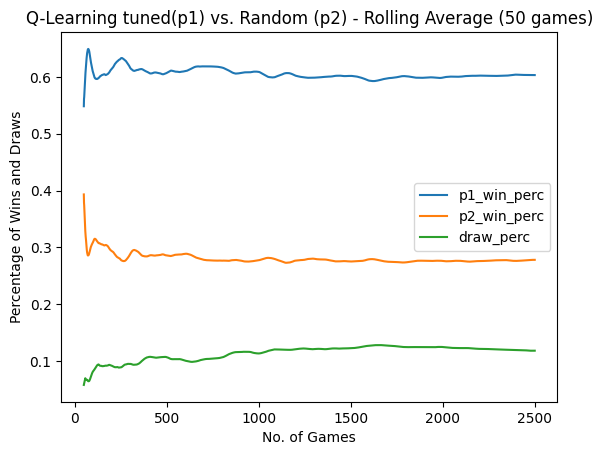

,p1_wins,p2_wins,draws,tot_reward,steps,p1_win_perc,p2_win_perc,draw_perc
0,0,1,0,4.0,214,0.000000,1.000000,0.000000
1,1,1,0,23.0,385,0.500000,0.500000,0.000000
2,1,2,0,4.0,64,0.333333,0.666667,0.000000
3,1,3,0,4.0,320,0.250000,0.750000,0.000000
4,2,3,0,24.0,236,0.400000,0.600000,0.000000
...,...,...,...,...,...,...,...,...
2495,1504,695,297,24.0,537,0.602564,0.278446,0.118990
2496,1505,695,297,24.0,256,0.602723,0.278334,0.118943
2497,1506,695,297,23.0,382,0.602882,0.278223,0.118895
2498,1506,695,298,-1.0,392,0.602641,0.278111,0.119248


In [20]:
results = qagent_tuned.test(env, opponent=RandomAgent(), num_episodes=2500, model_name='q_learn_tuned', plot_title='Q-Learning tuned(p1) vs. Random (p2) - Rolling Average (50 games)')
results

### SARSA Tuned Model

In [21]:
sagent_tuned = SarsaAgent(alpha=best_s['Alpha'], gamma=best_s['Gamma'])

In [22]:
sagent_tuned.train(env, num_episodes=100000, save_per_episodes=25000, model_name='sarsa_tuned', verbose=False)

2024-04-21 04:46:57.045837 | Training for sarsa_tuned_Apr21_044657 agent started


Episodes: 100%|██████████| 100000/100000 [19:46<00:00, 84.27it/s]


2024-04-21 05:06:43.659214 | Training for sarsa agent Completed. Time taken: 0:19:46.613377
Q-Table saved to sarsa_tuned_Apr21_044657_qtable.pkl


In [ ]:
sagent_tuned.load_q_table('sarsa_tuned_Apr21_044657_qtable.pkl')

Hyperparameters
alpha	: 0.5
gamma	: 0.95
epsilon	: 0.01
epsilon_min	: 0.01
epsilon_decay	: 0.995
algorithm	: sarsa
Reward Function
              Reward
valid_move       1.0
invalid_move     0.0
win             20.0
lose           -20.0
draw            -5.0


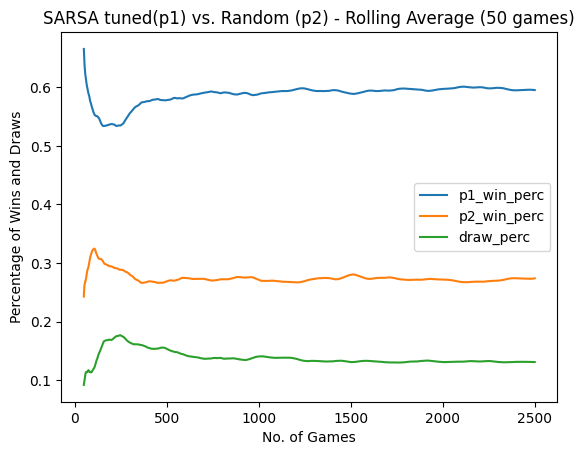

,p1_wins,p2_wins,draws,tot_reward,steps,p1_win_perc,p2_win_perc,draw_perc
0,1,0,0,23.0,124,1.000000,0.00000,0.000000
1,2,0,0,22.0,246,1.000000,0.00000,0.000000
2,3,0,0,22.0,146,1.000000,0.00000,0.000000
3,3,1,0,3.0,199,0.750000,0.25000,0.000000
4,4,1,0,23.0,485,0.800000,0.20000,0.000000
...,...,...,...,...,...,...,...,...
2495,1483,687,326,24.0,608,0.594151,0.27524,0.130609
2496,1484,687,326,23.0,206,0.594313,0.27513,0.130557
2497,1485,687,326,23.0,678,0.594476,0.27502,0.130504
2498,1485,688,326,4.0,569,0.594238,0.27531,0.130452


In [23]:
results = sagent_tuned.test(env, opponent=RandomAgent(), num_episodes=2500, plot_title='SARSA tuned(p1) vs. Random (p2) - Rolling Average (50 games)')
results

## Self-Play

### Q-Learning Self-Play

In [46]:
qagent_self = QLearningAgent(alpha=best_q['Alpha'], gamma=best_q['Gamma'])

In [47]:
qagent_self.train(env, opponent=qagent_tuned, num_episodes=100000, save_per_episodes=25000, model_name='q_learn_self', verbose=False)

2024-04-21 11:11:45.335713 | Training for q_learn_self_Apr21_111145 agent started


Episodes:   0%|          | 0/100000 [00:00<?, ?it/s]

Episodes: 100%|██████████| 100000/100000 [1:02:09<00:00, 26.81it/s]


2024-04-21 12:13:55.312725 | Training for q_learn agent Completed. Time taken: 1:02:09.977012
Q-Table saved to q_learn_self_Apr21_111145_qtable.pkl


In [ ]:
qagent_self.load_q_table('q_learn_self_Apr21_111145_qtable.pkl')

Hyperparameters
alpha	: 0.1
gamma	: 0.95
epsilon	: 0.01
epsilon_min	: 0.01
epsilon_decay	: 0.995
algorithm	: q_learn
Reward Function
              Reward
valid_move       1.0
invalid_move     0.0
win             20.0
lose           -20.0
draw            -5.0


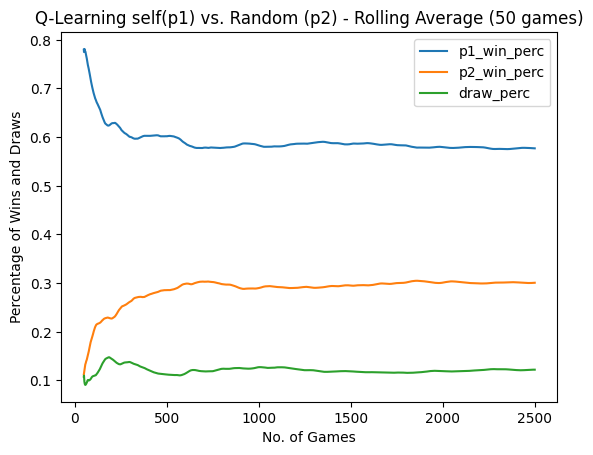

,p1_wins,p2_wins,draws,tot_reward,steps,p1_win_perc,p2_win_perc,draw_perc
0,1,0,0,24.0,258,1.000000,0.000000,0.000000
1,1,0,1,-1.0,462,0.500000,0.000000,0.500000
2,2,0,1,23.0,325,0.666667,0.000000,0.333333
3,3,0,1,24.0,314,0.750000,0.000000,0.250000
4,4,0,1,24.0,388,0.800000,0.000000,0.200000
...,...,...,...,...,...,...,...,...
2495,1438,753,305,23.0,128,0.576122,0.301683,0.122196
2496,1439,753,305,23.0,166,0.576292,0.301562,0.122147
2497,1440,753,305,24.0,606,0.576461,0.301441,0.122098
2498,1440,753,306,-1.0,469,0.576230,0.301321,0.122449


In [48]:
results = qagent_self.test(env, opponent=RandomAgent(), num_episodes=2500, model_name='q_learn_self', plot_title='Q-Learning self(p1) vs. Random (p2) - Rolling Average (50 games)')
results

### SARSA Self-Play

In [27]:
sagent_self = SarsaAgent(alpha=best_s['Alpha'], gamma=best_s['Gamma'])

In [28]:
sagent_self.train(env, opponent=sagent_tuned, num_episodes=100000, save_per_episodes=25000, model_name='sarsa_self', verbose=False)

2024-04-21 05:36:26.292530 | Training for sarsa_self_Apr21_053626 agent started


Episodes: 100%|██████████| 100000/100000 [21:04<00:00, 79.08it/s]


2024-04-21 05:57:30.868323 | Training for sarsa agent Completed. Time taken: 0:21:04.575793
Q-Table saved to sarsa_self_Apr21_053626_qtable.pkl


In [ ]:
sagent_self.load_q_table('sarsa_self_Apr21_053626_qtable.pkl')

Hyperparameters
alpha	: 0.5
gamma	: 0.95
epsilon	: 0.01
epsilon_min	: 0.01
epsilon_decay	: 0.995
algorithm	: sarsa
Reward Function
              Reward
valid_move       1.0
invalid_move     0.0
win             20.0
lose           -20.0
draw            -5.0


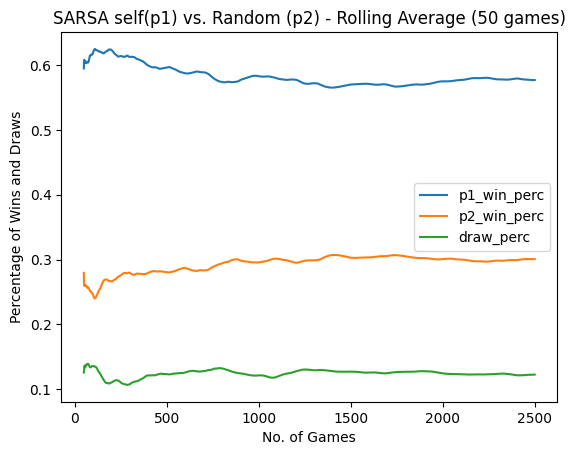

,p1_wins,p2_wins,draws,tot_reward,steps,p1_win_perc,p2_win_perc,draw_perc
0,0,1,0,4.0,196,0.000000,1.000000,0.000000
1,1,1,0,23.0,161,0.500000,0.500000,0.000000
2,2,1,0,24.0,439,0.666667,0.333333,0.000000
3,3,1,0,23.0,289,0.750000,0.250000,0.000000
4,3,1,1,-1.0,354,0.600000,0.200000,0.200000
...,...,...,...,...,...,...,...,...
2495,1442,748,306,24.0,366,0.577724,0.299679,0.122596
2496,1442,749,306,4.0,391,0.577493,0.299960,0.122547
2497,1442,750,306,4.0,673,0.577262,0.300240,0.122498
2498,1443,750,306,22.0,129,0.577431,0.300120,0.122449


In [29]:
results = sagent_self.test(env, opponent=RandomAgent(), num_episodes=2500, plot_title='SARSA self(p1) vs. Random (p2) - Rolling Average (50 games)')
results

### Retraining Q-Learning Self-Play

Self-Play is not performing better than earlier models. To enhance the exploration, the epsilon decay has to be revisited.

##### Finding number of episodes taken for epsilon decay with different decay rates

In [33]:
import math

epsilon_start = 1.0
epsilon_min = 0.01
epsilon_decay = 0.9995

# Calculate the number of iterations needed for epsilon to reach epsilon_min
iterations = math.log(epsilon_min / epsilon_start) / math.log(epsilon_decay)
iterations

9208.037594954125

In [42]:
epsilon_start = 1.0
epsilon_min = 0.01
epsilon_decay = 0.9999

# Calculate the number of iterations needed for epsilon to reach epsilon_min
iterations = math.log(epsilon_min / epsilon_start) / math.log(epsilon_decay)
iterations

46049.39923641465

Eploration over 46k episodes may benefit in better learning

##### Training with 0.9999 epsilon decay for 500,000 episodes

In [49]:
qagent_self1 = QLearningAgent(alpha=best_s['Alpha'], gamma=best_s['Gamma'], epsilon_decay=0.9999)

In [50]:
qagent_self1.load_q_table('q_learn_tuned_Apr21_040830_qtable.pkl')

In [51]:
qagent_self1.train(env, opponent=qagent_tuned, num_episodes=500000, save_per_episodes=250000, model_name='q_learn_self', verbose=False)

2024-04-21 12:20:10.664262 | Training for q_learn_self_Apr21_122010 agent started


Episodes:   0%|          | 0/500000 [00:00<?, ?it/s]

Episodes: 100%|██████████| 500000/500000 [3:26:15<00:00, 40.40it/s]    


2024-04-21 15:46:25.797549 | Training for q_learn agent Completed. Time taken: 3:26:15.133287
Q-Table saved to q_learn_self_Apr21_122010_qtable.pkl


In [ ]:
qagent_self1.load_q_table('q_learn_self_Apr21_122010.pkl')

Hyperparameters
alpha	: 0.5
gamma	: 0.95
epsilon	: 0.01
epsilon_min	: 0.01
epsilon_decay	: 0.9999
algorithm	: q_learn
Reward Function
              Reward
valid_move       1.0
invalid_move     0.0
win             20.0
lose           -20.0
draw            -5.0


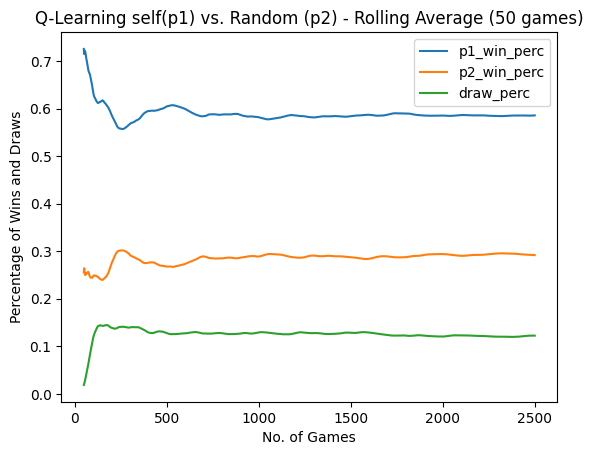

,p1_wins,p2_wins,draws,tot_reward,steps,p1_win_perc,p2_win_perc,draw_perc
0,1,0,0,24.0,360,1.000000,0.000000,0.000000
1,2,0,0,23.0,583,1.000000,0.000000,0.000000
2,2,1,0,4.0,462,0.666667,0.333333,0.000000
3,2,2,0,4.0,99,0.500000,0.500000,0.000000
4,3,2,0,24.0,693,0.600000,0.400000,0.000000
...,...,...,...,...,...,...,...,...
2495,1463,729,304,4.0,136,0.586138,0.292067,0.121795
2496,1464,729,304,24.0,521,0.586304,0.291950,0.121746
2497,1465,729,304,23.0,531,0.586469,0.291833,0.121697
2498,1466,729,304,23.0,569,0.586635,0.291717,0.121649


In [52]:
results = qagent_self1.test(env, opponent=RandomAgent(), num_episodes=2500, model_name='q_learn_self', plot_title='Q-Learning self(p1) vs. Random (p2) - Rolling Average (50 games)')
results

##### Retraining for another 500,000 episodes

In [76]:
qagent_self1.train(env, opponent=qagent_tuned, num_episodes=500000, save_per_episodes=250000, model_name='q_learn_self', verbose=False)

2024-04-21 20:25:52.462583 | Training for q_learn_self_Apr21_202552 agent started


Episodes: 100%|██████████| 500000/500000 [3:49:02<00:00, 36.38it/s]   


2024-04-22 00:14:54.648480 | Training for q_learn agent Completed. Time taken: 3:49:02.185897
Q-Table saved to q_learn_self_Apr21_202552_qtable.pkl


Hyperparameters
alpha	: 0.5
gamma	: 0.95
epsilon	: 0.01
epsilon_min	: 0.01
epsilon_decay	: 0.9999
algorithm	: q_learn
Reward Function
              Reward
valid_move       1.0
invalid_move     0.0
win             20.0
lose           -20.0
draw            -5.0


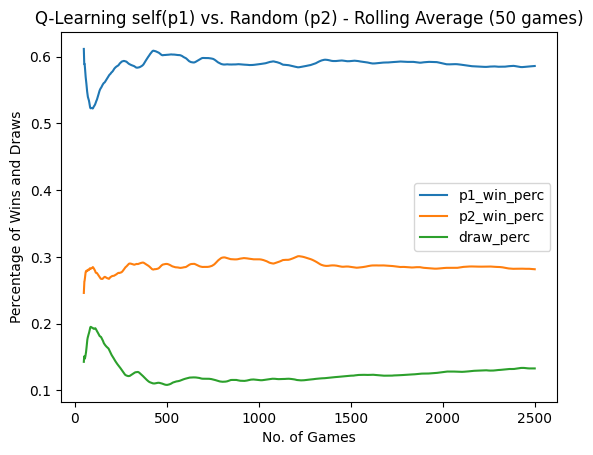

,p1_wins,p2_wins,draws,tot_reward,steps,p1_win_perc,p2_win_perc,draw_perc
0,1,0,0,23.0,226,1.000000,0.000000,0.000000
1,2,0,0,24.0,281,1.000000,0.000000,0.000000
2,2,0,1,-1.0,985,0.666667,0.000000,0.333333
3,2,1,1,4.0,301,0.500000,0.250000,0.250000
4,3,1,1,23.0,391,0.600000,0.200000,0.200000
...,...,...,...,...,...,...,...,...
2495,1463,701,332,-1.0,399,0.586138,0.280849,0.133013
2496,1464,701,332,24.0,308,0.586304,0.280737,0.132960
2497,1465,701,332,22.0,175,0.586469,0.280624,0.132906
2498,1466,701,332,24.0,356,0.586635,0.280512,0.132853


In [77]:
results = qagent_self1.test(env, opponent=RandomAgent(), num_episodes=2500, model_name='q_learn_self', plot_title='Q-Learning self(p1) vs. Random (p2) - Rolling Average (50 games)')
results

No luck with Self-Play even after it was trained for 1M episodes.

Therefore, the Q-Learning with the tuned hyperparameters (α = 0.1 and γ = 0.95) is the best among all other models and combination we have tried for playing Tic-Tac-Toe

----